<center>
<img src="https://i.ibb.co/Ycs11Fg/meme.jpg">
</center>

# Андан на экономе: домашнее задание 3
## Задача классификации

**ФИО:** Литасов Александр Сергеевич

## Общая информация


__Дата выдачи:__ 14.04.2023

__Мягкий дедлайн:__ 23:59MSK 07.05.2023

__Жесткий дедлайн:__ 23:59MSK 14.05.2023

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. 

> Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

> Фиксируйте все seed'ы, random_state'ы и тд - ваш код должен быть воспроизводим с теми же результатами.

## Формат сдачи

Сам ноутбук называйте в формате hw-03-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

## Импорт необходимых библиотек 

Импортируйте все используемые библиотеки здесь.

In [1]:
# Ваш код здесь


# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

## Задача 

В данном задании вам необходимо построить предсказательную модель, определяющую пол клиента по его банковским транзакциям.

Вам доступны 2 файла:
* __transaction.csv__ - файл с транзакциями, колонки:
    * user_id - целочисленный идентификатор пользователя
    * dt - дата и время совершения транзации, принцип кодирования: "DAY TIME"
        * DAY - порядковый день транзации с начала сбора данных
        * TIME - время в формате hh:mm:ss
    * type - тип (категория) совершаемой транзакции
    * value - сумма транзакции
    
* __gender.csv__ - файл с данными о полах клиентов.
    * user_id - целочисленный идентификатор пользователя
    * gender - целевая переменная, закодированная лейблами 0 и 1. Это сделано:
        * a) для удобства
        * б) для избежания холиваров о правильности исходных меток 

Но если вы вдруг захотите похоливарить о том, что метки только две - то заметьте, что о полноте данных мы тоже не утверждаем.

# Часть 1: минималочка [макс 20 баллов]

В этой части мы с вами попробуем построить самую простую модель для предсказания.

Как мы с вами увидим: главная сложность - правильная подготовка данных. В таких задачах то, как именно вы преобразуете данные для обучения модели и будет во много определять её качество.

В этой части мы сделаем простое преобразование данных путём простой агрегации данных о величине транзакций. 

## Загрузка данных [5 баллов] 

Скачайте данные для задачи с Яндекс.Диска:
https://disk.yandex.ru/d/DGy6bbLaMZmrQg.

Загрузите файлы с транзакциями и целевой меткой в pd.DataFrame.

__Внимание__: у файла transactions.csv колоночный разделитель - точка с запятой ";"

In [2]:
import pandas as pd
transactions = pd.read_csv('/Users/slitasov/Downloads/transactions.csv', sep=';')
gender = pd.read_csv('/Users/slitasov/Downloads/gender.csv')
df = pd.merge(transactions, gender, on='user_id')


## Подготовка данных [10 баллов] 

Для данной задачи необходимо как-то собрать данные для каждого пользователя в один вектор (строку таблицы). Сейчас, как вы можете увидеть, в таблице с данными одному пользователю может соответствовать много строк (каждая операция - отдельная строка).

Таким образом, необходима агрегация данных - это можно сделать множеством разных способов.

### Агрегация 

Произведите простую агрегацию данных и для каждого пользователя в качестве признаков получите сумму, среднее и стандартное отклонение величины его транзакций. 

Так же добавите для каждого пользователя колонку с таргетом.

По итогу вы должны получить таблицу с колонками:
* user_id
* value_sum
* value_mean
* value_std
* gender

In [3]:
aggregated_data = df.groupby('user_id', as_index=False)['value'].agg(['sum', 'mean', 'std']).reset_index()
aggregated_data.columns = ['user_id', 'value_sum', 'value_mean', 'value_std']
aggregated_data = pd.merge(aggregated_data, gender, on='user_id')


In [4]:
aggregated_data

,user_id,value_sum,value_mean,value_std,gender
0,22899,274383.315,2143.619648,656.186785,1.0
1,27914,166436.523,2521.765500,415.972053,1.0
2,28753,251578.185,1980.930591,749.304999,0.0
3,31385,717856.052,2323.158744,632.491585,0.0
4,38084,1360028.958,2095.576206,649.030870,0.0
...,...,...,...,...,...
8351,99953525,159252.786,1608.614000,709.903466,0.0
8352,99967537,13026.313,2605.262600,123.013557,1.0
8353,99988578,1304612.429,2185.280451,638.235664,1.0
8354,99991245,249213.163,2026.123276,739.432221,1.0


### Отложенная выборка 

Получите полный список пользователей и разделите их на два списка:
* тренировочный список пользователей (80%)
* тестовый список пользователей (20%)

__Важное замечание__: Далее во всех пунктах, где вам нужно провалидировать (оценить) получившуюся модель исползуйте данные только для этих тестовых пользователей.

Обучать все модели, естественно, нужно только на данных пользователей из обучающего списка.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
import pandas 
aggregated_data = aggregated_data.fillna(aggregated_data.mean())


Для нашей задачи получите признаки и целевые метки обучающей и тестовой выборки. 

In [7]:
X_train, X_test, y_train,y_test = train_test_split(aggregated_data.drop(columns ='gender'), aggregated_data['gender'] , test_size=0.2, random_state = 43)

## Обучение и оценка модели [5 баллов] 

Обучите модель логистической регрессии с дефолтными параметрами.

Получите предсказания вероятностей первого класса.

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict_proba(X_train)[:, 1] #берем вероятнсть только первого класса
y_test_pred = lr.predict_proba(X_test)[:, 1] #берем вероятнсть только первого класса

### Валидация 

Посчитайте ROC_AUC, accuracy, precision, recall для получившихся предсказаний.

Для метрик, для которых необходимы метки классов, а не вероятности - используйте порог 0.5.

Далее при оценки других моделей приводите эти же метрики (если явно не указано иное).

In [9]:
from sklearn.metrics import roc_auc_score, accuracy_score,precision_score, recall_score

y_train_pred_labels = (y_train_pred >= 0.5)
y_test_pred_labels = (y_test_pred >= 0.5)

roc_auc = roc_auc_score(y_test,  y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred_labels)
precision =precision_score(y_test, y_test_pred_labels)
recall = recall_score(y_test, y_test_pred_labels)

print("ROC AUC", roc_auc)
print("фccuracy", accuracy)
print("precision", precision)
print("recall", recall)


ROC AUC 0.48960860423742525
фccuracy 0.5478468899521531
precision 0.0
recall 0.0


### Вывод

Как вы оцениваете качество получившейся модели и возможные причины такого качества?

__Ваш вывод:__

- precision и recall составляют 0, а ROC AUC и accuracy говорят о том, что даваемые моделью предсказания почти рандомны. Слабость модели можно объяснить невозможностью линейного разделения данных и слишком высоким порогом отнесения данных к классу 1 (при уменьшении порога precision и recall возрастают, но ROC AUC и accuracy не изменяются)

- Однако, учитывая дальнейшее задание, слабость модели объясняется тем, что мы пытаемся определить пол человека по сумме его покупок, не обращая внимания на то, что именно он покупает

# Часть 2: мб сделаем что-то более серьёзное? [макс 20 баллов]

Давайте попробуем улучшить качество решения задачи за счёт другого метода подготовки данных.

Ранее мы использовали простое преобразование, когда каждый клиент описывался только 3 значениями.
Давайте сделаем что-то более сложное и попробуем добавить больше данных о клиенте для модели.

## Подготовка данных [15 баллов]

Воспользуемся тем, что каждая транзакция у нас имеет свой тип - это уж точно более информативно, чем агрегация по всем транзакциям.

Создайте сводную таблицу, где для каждого клиента (строка) будут указаны его суммарные траты на каждую категорию (столбец). Таким образом, вы должны получить таблицу с числом строк равным количеству клиентов и числом столбцов - количеству категорий трат. Каждая ячейка должна содержать суммарные траты данного клиента в данной категории.

__Подсказка__: у DataFrame есть полезный метод `pivot_table`.

In [10]:
import pandas as pd
transactions = pd.read_csv('/Users/slitasov/Downloads/transactions.csv', sep=';')
gender = pd.read_csv('/Users/slitasov/Downloads/gender.csv')
pivoted = transactions.pivot_table(index='user_id', columns='type', values='value', aggfunc='sum')
pivoted = pd.merge(pivoted, gender, on='user_id')


## Обучение и валидация модели [5 баллов]

Аналогично предыдущей части разделите данные на обучающую и тестовую выборку (80%/20%), обучите модель на дефолтных параметрах и оцените качество.

In [11]:
import pandas 
pivoted = pivoted.fillna(pivoted.mean())

In [12]:
X_train, X_test, y_train, y_test = train_test_split(pivoted.drop(columns ='gender'), pivoted['gender'] , test_size=0.2, random_state = 43)

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict_proba(X_train)[:, 1] #берем вероятнсть только первого класса
y_test_pred = lr.predict_proba(X_test)[:, 1] #берем вероятнсть только первого класса

In [14]:
from sklearn.metrics import roc_auc_score, accuracy_score,precision_score, recall_score

y_train_pred_labels = (y_train_pred >= 0.5)
y_test_pred_labels = (y_test_pred >= 0.5)

roc_auc = roc_auc_score(y_test,  y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred_labels)
precision =precision_score(y_test, y_test_pred_labels)
recall = recall_score(y_test, y_test_pred_labels)

print("ROC AUC", roc_auc)
print("фccuracy", accuracy)
print("precision", precision)
print("recall", recall)


ROC AUC 0.5665736697396087
фccuracy 0.5759569377990431
precision 0.5880149812734082
recall 0.20767195767195767


### Вывод 

Изменилось ли качество модели? Почему?

__Ваш вывод:__ Качество модели изменилось в лучшую сторону, потому что мы начали смотреть на то, что покупает каждый конкретный человек и из этого определять его пол

# Часть 3: что мы всё про данные? Давайте про модель 
# [макс 30 баллов]

Ранее мы работали только над подготовкой обучающей выборки. Давайте теперь попробуем изменить модель, чтобы добиться наилучшего качества. 

Входные данные для этой части - выборка с предыдущей.

## Нормирование данных [5 баллов] 

Как мы знаем, линейные модели любят нормированные данные.

Приведите значения всех признаков в отрезок [0, 1]

__Замечание__: если вы используете метод, который удаляет информацию о названиях колонок - сохраните эти названия в отдельную переменную, вам это потом может понадобиться.

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns = pivoted.columns.tolist()
pivoted = scaler.fit_transform(pivoted)
pivoted = pd.DataFrame(pivoted, columns=columns)

## Подбор параметров [15 баллов]

Подберите наилучшие параметры для модели линейной регрессии. Важные уточнения:

* используйте перебор по сетке
* в качестве метрики используйте ROC AUC
* для оценки параметров делайте кросс-валидацию на 4 фолдах

__Замечание__: у линейной регрессии множество доступных значений для некоторых параметров зависит от метода оптимизации (solver). Например, lbfgs-алгоритм не подерживает l1-регуляризацию.

Поэтому действуйте шагами: сначала подберите solver, а потом уже переберите доступные для него параметры.

#####   Предполагаю, в задании опечатка, и использовать нужно было логистическую регрессию, как и ранее - у линейной регрессии нет solver

In [22]:
from sklearn.model_selection import GridSearchCV # для подбора solver и параметра регуляризации 

model = LogisticRegression()
param_grid = { 'solver': ['lbfgs', 'liblinear', 'sag'],'C': [0.1, 1, 10, 100]}

grid_search = GridSearchCV(model, param_grid, cv=4, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='roc_auc')

In [23]:
grid_search.best_params_['solver'] # лучший solver

'liblinear'

Оцените качество лучшей модели на тестовых данных аналогично предыдущим задачам.

In [26]:
model = LogisticRegression(solver=grid_search.best_params_['solver'], C=grid_search.best_params_['C'])
model.fit(X_train, y_train)

y_train_pred = lr.predict_proba(X_train)[:, 1] #берем вероятнсть только первого класса
y_test_pred = lr.predict_proba(X_test)[:, 1] #берем вероятнсть только первого класса

y_train_pred_labels = (y_train_pred >= 0.5)
y_test_pred_labels = (y_test_pred >= 0.5)

roc_auc = roc_auc_score(y_test,  y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred_labels)
precision =precision_score(y_test, y_test_pred_labels)
recall = recall_score(y_test, y_test_pred_labels)

print("ROC AUC", roc_auc)
print("фccuracy", accuracy)
print("precision", precision)
print("recall", recall)


ROC AUC 0.5665736697396087
фccuracy 0.5759569377990431
precision 0.5880149812734082
recall 0.20767195767195767


Получилось ли добиться лучше качества при подборе параметров?
Почему так? 

Для чего мы использовали одновременно кросс-валидацию и отложенную тестовую выборку?

__Ваш вывод__:

- Нет, данные не получилось улучшить - ROC AUC упал

- Использование одновременно кросс-валидации и отложенной выборки позволило нам обучить модель на большем количестве данных и избежать переобучения за счет чередования тестовых выборок

## Подбор отсечения [5 баллов]

Ранее мы работали или с вероятностями из модели или с метками, полученных при отсечении по веростности с порогом 0.5.

Стоит сказать, что порог 0.5 для разделения классов не всегда самый лучший. Часто нам нужно так подобрать порог, чтобы удовлетворить наши требования по точности и полноте.

Давайте подберём порог, который максимизирует F_beta меру при условии, что нам полнота в 5 раз важнее точности.

Вычислите наилучший порог и нарисуйте график зависимости этой метрики от порога разделения.

Оптимальный порог -  0.0


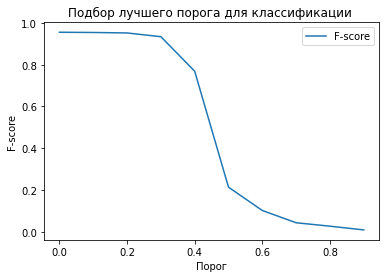

In [27]:
from sklearn.metrics import fbeta_score
import numpy as np
import matplotlib.pyplot as plt

beta = 5
f_scores = []
thresholds = np.arange(0, 1.0, 0.1)

for threshold in thresholds:
    y_pred = (y_test_pred >=threshold)
    f_scores.append(fbeta_score(y_test, y_pred, beta=beta))

threshold = thresholds[np.argmax(f_scores)]

print("Оптимальный порог - ", threshold)

plt.plot(thresholds, f_scores,label="F-score")
plt.legend()
plt.xlabel("Порог")
plt.ylabel("F-score")
plt.title("Подбор лучшего порога для классификации ")
plt.show()

## Интерпретация модели [5 баллов]

Часто нам хочется интерпритировать предсказания модели - понять, как наши признаки влияют на её ответ.
В случае сложных моделей сделать это не просто - чем сложнее модель, тем более сложные закономерности она извлекает и тем тяжелее нам их понять.

Но в случае логистической регресии это просто сделать, посмотрев на её обучаемые параметры (вспоминайте!).

Получите список признаков, которые увеличивают вероятность метки 0.
Аналогично для метки 1.

In [28]:
coef = model.coef_ # определение корелляции параметров и итогового признака gender
features = X_train.columns.tolist()
df = pd.DataFrame({'коэфф': coef[0], 'признаки': features})
negative = df[df['коэфф'] < 0]['признаки'].tolist()
print('Признаки, увеличивающие вероятность метки 0', negative)


Признаки, увеличивающие вероятность метки 0 ['user_id', 'Авиалинии, авиакомпании, нигде более не классифицированные', 'Автомойки', 'Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка', 'Агентства по аренде автомобилей', 'Агенты и менеджеры по аренде недвижимости', 'Аксессуары для женщин', 'Аптеки', 'Беспошлинные магазины Duty Free', 'Бизнес-сервис', 'Билльярд-клубы', 'Больницы', 'Боулинг-клубы', 'Булочные', 'Бытовое оборудование', 'Ветеринарные услуги', 'Генеральные подрядчики по вентиляции, теплоснабжению, и водопроводу', 'Готовая женская одежда', 'Денежные переводы', 'Дилеры по продаже печатной продукции', 'Дорожный и мостовой сборы, пошлины', 'Драгоценные камни и металлы, часы и ювелирные изделия', 'Звонки с использованием телефонов, считывающих магнитную ленту', 'Зоомагазины', 'Зубные и медицинские лаборатории', 'Изготовление и продажа меховых изделий', 'Иной сервис', 'Клубы — сельские клубы, членство(спорт

In [29]:
positive = df[df['коэфф'] > 0]['признаки'].tolist()
print('Признаки, увеличивающие вероятность метки 1', positive)


Признаки, увеличивающие вероятность метки 1 ['Авиалинии, авиакомпании', 'Автобусные линии', 'Автозапчасти и аксессуары', 'Автоматизированные бензозаправки', 'Автошины', 'Ассоциации — гражданские, социальные и братские', 'Бакалейные магазины, супермаркеты', 'Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков', 'Веломагазины — продажа и обслуживание', 'Видеопрокат', 'Галереи и художественные посредники', 'Галереи/учреждения видеоигр', 'Горючее топливо — уголь, нефть, разжиженный бензин, дрова', 'Дантисты, ортодонтисты', 'Денежные переводы MasterCard MoneySend', 'Детская одежда, включая одежду для самых маленьких', 'Доктора, нигде ранее не классифицируемые', 'Жилье — отели, мотели, курорты', 'Информационные провайдеры', 'Кабельные и другие платные телевизионные услуги', 'Канцелярия, офисные сопутствующие товары, бумага для печатания и письма', 'Кинотеатры', 'Книжные магазины', 'Колледжи, университеты, профессиональные школы и младшие колледжи', 'Ко

# Часть 4: ва-банк / пространство для творчества [макс 30 баллов]

Добейтесь максимального качества, больше качество - больше баллов.

Стратегия подготовки данных и обучения модели на ваше усмотрение.

Условия:
* Оценка на отложенной тестовой группе пользователей, использовавшейся в прошлых пунктах (20%)
* В качестве метрики используйте ROC_AUC

__Замечание__: 

Ответа на вопрос "какое нужно качество для максимального балла?" не будет.

Используйте все свои знания, чтобы добиться наилучшего результата.

In [30]:
import pandas as pd
transactions = pd.read_csv('/Users/slitasov/Downloads/transactions.csv', sep=';')
gender = pd.read_csv('/Users/slitasov/Downloads/gender.csv')
pivoted = transactions.pivot_table(index='user_id', columns='type', values='value', aggfunc='sum')
pivoted = pd.merge(pivoted, gender, on='user_id')

In [31]:
import pandas 
pivoted = pivoted.fillna(pivoted.mean())

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # Изменим Scaler
pivoted.drop(columns = 'user_id', inplace = True) # удалим колонку user_id за ненадобностью
columns = pivoted.columns.tolist()
pivoted = scaler.fit_transform(pivoted)
pivoted = pd.DataFrame(pivoted, columns=columns)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(pivoted.drop(columns ='gender'), pivoted['gender'] , test_size=0.2, random_state = 43)

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

model = LogisticRegression(penalty='l2')
param_grid = {'solver': ['lbfgs', 'liblinear', 'sag', 'saga'], 'C': [10, 100, 150, 250]} # Измением параметры регуляризации
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='roc_auc')
grid_search.fit(X_train, y_train)
model = LogisticRegression(solver=grid_search.best_params_['solver'], C=grid_search.best_params_['C'], penalty='l2')
model.fit(X_train, y_train)

LogisticRegression(C=250, solver='sag')

In [35]:
y_train_pred = model.predict_proba(X_train)[:, 1]
y_test_pred = model.predict_proba(X_test)[:, 1]

y_train_pred_labels = (y_train_pred>= 0.5)
y_test_pred_labels = (y_test_pred >= 0.5)


In [36]:
roc_auc = roc_auc_score(y_test,  y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred_labels)
precision =precision_score(y_test, y_test_pred_labels)
recall =recall_score(y_test, y_test_pred_labels)

print("ROC AUC", roc_auc)
print("фccuracy", accuracy)
print("precision", precision)
print("recall", recall)

ROC AUC 0.5611628081606248
фccuracy 0.5711722488038278
precision 0.5537190082644629
recall 0.26587301587301587


- В 4 пункте было использовано несколько других методов предобратотки, изменены параметры регуляризации и тип Scaler, однако сильно улучшить ROC AUC с использованием логистической регрессии не вышло

- С использованием случайного леса ROC AUC составляет 0,8